In [1]:
import numpy as np
import pylab as plt
from math import *
from pymc import Uniform, MCMC, deterministic

from scipy.interpolate import interp1d as interp
from scipy.optimize import brentq, minimize_scalar, basinhopping
from profiles import build_profile, build_kernel
from dispersion import SphericalJeansDispersion
from likelihood import GaussianLikelihood
#from fitter import *

%matplotlib inline

In [2]:
directory = '/home/andrea/Desktop/work/DWARF/'
D = 39.81
dwarf_props = {'D':D, 'rt':np.inf}

In [3]:
cusp = build_profile('NFW')
core = build_profile('Zhao', a=1, b=3, c=0)

In [4]:
r0 = 0.5
rho0 = 1e8
cusp.r0 = r0; cusp.rho0 = rho0
core.r0 = r0; core.rho0 = rho0

In [5]:
angles = np.linspace(0, 2)
Jcusp = [cusp.Jfactor(theta=t, **dwarf_props) for t in angles]
Jcore = [core.Jfactor(theta=t, **dwarf_props) for t in angles]

/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


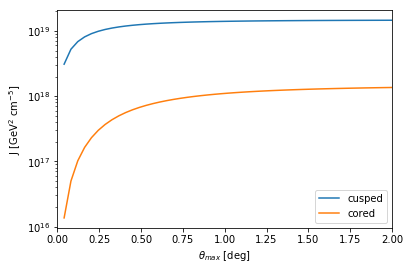

In [8]:
plt.semilogy(angles, Jcusp, label='cusped');
plt.semilogy(angles, Jcore, label='cored');
plt.xlabel(r'$\theta_{max}$ [deg]');
plt.ylabel(r'J [GeV$^2$ cm$^{-5}$]');
plt.legend();
plt.xlim(0, 2);
plt.savefig(directory + 'ASTROJPY/results/Jcusp_Jcore', dpi=300);